In [1]:
# Requests for handling HTTP get and other requests
import requests
import time # import for playing nice and not getting blocked
import pandas as pd
# from BeautifulSoup4 import BeatifulSoup if installed through pip install BeautifulSoup4
# 
from bs4 import BeautifulSoup

In [ ]:
# if bs4 not found install it with
#  !pip install beatifulsoup4
# https://www.crummy.com/software/BeautifulSoup/

In [2]:
centrs = "https://www.ss.com/lv/real-estate/flats/riga/centre/sell/"

In [3]:
req = requests.get(centrs)
req.status_code

200

In [4]:
req.text[:200]

'<!DOCTYPE html>\r\n<HTML><HEAD>\r\n<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>\r\n<meta http-equiv="Content-Type" CONTENT="text/html; charset=UTF-8">\r\n<meta name="viewport" c'

In [5]:
# parser means structuring your text into some structure
soup = BeautifulSoup(req.text, 'lxml') # lxml is improved parser, a little bit more lenient
soup.title

<title>SS.COM Dzīvokļi - Rīga - Centrs, Cenas, Pārdod - Sludinājumi</title>

In [6]:
type(soup)

bs4.BeautifulSoup

In [7]:
# https://www.crummy.com/software/BeautifulSoup/bs4/doc/#find-all
tables = soup.find_all("table") # finds ALL elements matching our filter
len(tables) 

7

In [7]:
# find finds just one match
headline = soup.find("tr", {"id":"head_line"}) # this is a shorter way of finding by tr AND this element having particular id
headline

<tr id="head_line">
<td class="msg_column" colspan="3" width="70%">
<span style="float:left;"> Sludinājumi
</span>
<span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
<noindex>
<a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
</td>
<td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td><td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title

In [8]:
type(headline)

bs4.element.Tag

In [9]:
headtds = headline.find_all("td")
# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/td
headtds

[<td class="msg_column" colspan="3" width="70%">
 <span style="float:left;"> Sludinājumi
 </span>
 <span align="right" class="msg_column" style="float:right;text-align:right;padding-right:3px;">
 <noindex>
 <a class="a19" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4S.html" rel="nofollow">datums</a></noindex></span>
 </td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SFDwT.html" rel="nofollow" title="">Iela</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4SelM=.html" rel="nofollow" title="">Ist.</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4QelM=.html" rel="nofollow" title="">m2</a></noindex></td>,
 <td class="msg_column_td" nowrap=""><noindex><a class="a18" href="/lv/real-estate/flats/riga/centre/sell/fDgSeF4XelM=.html" rel="nofollow" title="

In [10]:
len(headtds) # so we have 8 table data elements

8

In [11]:
headline.text

'\n\n\xa0Sludinājumi\r\n\n\n\ndatums\n\nIelaIst.m2StāvsSērijaCena, m2Cena'

In [12]:
headcolumns = [el.text for el in headtds[1:]] #.text gets us content even from children and grandchildren
headcolumns

['Iela', 'Ist.', 'm2', 'Stāvs', 'Sērija', 'Cena, m2', 'Cena']

In [13]:
# lets combine the above cells into a function which will always get us columns
def getColList(soup):
    column_list = ["description","url"] # we decided to that we need these two column names no matter the html
    headline = soup.find("tr", {"id":"head_line"})
    headtds = headline.find_all("td")
    headcolumns = [el.text for el in headtds[1:]] # this will get all column names starting with 2nd in HTML
    column_list += headcolumns
    return column_list

In [14]:
column_names = getColList(soup)
column_names

['description',
 'url',
 'Iela',
 'Ist.',
 'm2',
 'Stāvs',
 'Sērija',
 'Cena, m2',
 'Cena']

In [15]:
trows = soup.find_all('tr')
len(trows)


39

In [19]:
# hardest part in this 
# how to filter only specific rows
# we need to find something that is unique to our apartment rows but not to the extra rows
# remember we id is not guaranteed, so "" gives us default value when there is no id
apt_rows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
len(apt_rows)

30

In [20]:
apt_rows[-1]

<tr id="tr_47537980"><td class="msga2 pp0"><input id="c47537980" name="mid[]" type="checkbox" value="47537980_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/ehxci.html" id="im47537980"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/634/158414/31682721.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="JUE0ZCU4OSU5MWolOTAlOUElRUZjJTg4JThGayU4RCU5NiVBM2slODYlOEFmJThEJTk3JUEzZiU4MyU4OGY=|s2SX6Xb" href="/msg/lv/real-estate/flats/riga/centre/ehxci.html" id="dm_47537980">Просторная и продуманная квартира в новом проекте. 

Тщательно</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Brīvības 230</td><td c="1" class="msga2-o pp6" nowrap="">4</td><td c="1" class="msga2-o pp6" nowrap="">93</td><td c="1" class="msga2-o pp6" nowrap="">6/10</td><td c="1" class="msga2-o pp6" nowrap="">Jaun.</td><td c="1" class="msga2-o pp6" nowrap="">1,667 €</td><td c="1" class="msga2-o pp6" nowrap="">155,000  €</td></tr>

In [21]:
# lets make a function from the above doodle and make it work on most pages on SS
def getRowList(soup):
    trows = soup.find_all('tr')
    aprows = [row for row in trows if row.get('id',"").startswith("tr_") and not row.get('id',"").startswith("tr_bnr") ]
    return aprows

In [22]:
row_tds = apt_rows[0].find_all('td')
len(row_tds)

10

In [23]:
row_tds

[<td class="msga2 pp0"><input id="c48047630" name="mid[]" type="checkbox" value="48047630_1106_0"/></td>,
 <td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/fexeo.html" id="im48047630"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/623/155568/31113474.th2.jpg"/></a></td>,
 <td class="msg2"><div class="d1"><a class="am" data="ayU4QiU4MWclODUlQjRpJTdCJThDJTk4ZyU4NCU3RmMlODdscXolODclOTJpJTgzeGE=|6SH1T88FSb" href="/msg/lv/real-estate/flats/riga/centre/fexeo.html" id="dm_48047630">Pārdod studio tipa dzīvokli renovētā mājā. Pvn iekļauts cenā. 
 </a></div></td>,
 <td c="1" class="msga2-o pp6" nowrap="">Avotu 4</td>,
 <td c="1" class="msga2-o pp6" nowrap="">1</td>,
 <td c="1" class="msga2-o pp6" nowrap="">20</td>,
 <td c="1" class="msga2-o pp6" nowrap="">1/5</td>,
 <td c="1" class="msga2-o pp6" nowrap="">Renov.</td>,
 <td c="1" class="msga2-o pp6" nowrap="">1,650 €</td>,
 <td c="1" class="msga2-o pp6" nowrap="">32,990  €</td>]

In [24]:
row_tds[0].text

''

In [25]:
row_tds[1].text

''

In [26]:
row_tds[1].attrs

{'class': ['msga2']}

In [27]:
img = row_tds[1].find("img")
img

<img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/623/155568/31113474.th2.jpg"/>

In [28]:
img.get("src")

'https://i.ss.com/gallery/4/623/155568/31113474.th2.jpg'

In [29]:
row_tds[2].text

'Pārdod studio tipa dzīvokli renovētā mājā. Pvn iekļauts cenā. \r\n'

In [30]:
row_tds[-1].text

'32,990  €'

In [31]:
a = row_tds[1].find('a') # a tag is called anchor tag
a

<a href="/msg/lv/real-estate/flats/riga/centre/fexeo.html" id="im48047630"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/623/155568/31113474.th2.jpg"/></a>

In [32]:
a.attrs

{'href': '/msg/lv/real-estate/flats/riga/centre/fexeo.html',
 'id': 'im48047630'}

In [34]:
a.get('href'), a['href']

('/msg/lv/real-estate/flats/riga/centre/fexeo.html',
 '/msg/lv/real-estate/flats/riga/centre/fexeo.html')

In [35]:
def getRow(row,colist=column_names):
    row_tds = row.find_all('td')
    rowDict = {}
    if len(row_tds) <3: # a little sanity check
        print("Hmm bad row")
        return rowDict
    
    rowDict[colist[0]] = row_tds[2].text # so the big assumption is that we always get description in 3rd column
    rowDict[colist[1]] = "https://ss.com" + row_tds[1].find('a').get('href')
    for td,key in zip(row_tds[3:],colist[2:]): 
        rowDict[key] = td.text
    return rowDict

In [36]:
apt_rows[0] # first row of ads

<tr id="tr_48047630"><td class="msga2 pp0"><input id="c48047630" name="mid[]" type="checkbox" value="48047630_1106_0"/></td><td class="msga2"><a href="/msg/lv/real-estate/flats/riga/centre/fexeo.html" id="im48047630"><img alt="" class="isfoto foto_list" src="https://i.ss.com/gallery/4/623/155568/31113474.th2.jpg"/></a></td><td class="msg2"><div class="d1"><a class="am" data="ayU4QiU4MWclODUlQjRpJTdCJThDJTk4ZyU4NCU3RmMlODdscXolODclOTJpJTgzeGE=|6SH1T88FSb" href="/msg/lv/real-estate/flats/riga/centre/fexeo.html" id="dm_48047630">Pārdod studio tipa dzīvokli renovētā mājā. Pvn iekļauts cenā. 
</a></div></td><td c="1" class="msga2-o pp6" nowrap="">Avotu 4</td><td c="1" class="msga2-o pp6" nowrap="">1</td><td c="1" class="msga2-o pp6" nowrap="">20</td><td c="1" class="msga2-o pp6" nowrap="">1/5</td><td c="1" class="msga2-o pp6" nowrap="">Renov.</td><td c="1" class="msga2-o pp6" nowrap="">1,650 €</td><td c="1" class="msga2-o pp6" nowrap="">32,990  €</td></tr>

In [37]:
getRow(apt_rows[0])

{'description': 'Pārdod studio tipa dzīvokli renovētā mājā. Pvn iekļauts cenā. \r\n',
 'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/fexeo.html',
 'Iela': 'Avotu 4',
 'Ist.': '1',
 'm2': '20',
 'Stāvs': '1/5',
 'Sērija': 'Renov.',
 'Cena, m2': '1,650 €',
 'Cena': '32,990  €'}

In [38]:
def getRows(rowlist,colist=column_names):
    return [getRow(row, colist=colist) for row in rowlist]


In [39]:
row_ads = getRows(apt_rows)
row_ads[-3:]

[{'description': 'Pārdodu plašu 5 istabu dzīvokli projektā „Šokolāde” (2008). Papi',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/eghbl.html',
  'Iela': 'Hospitāļu 23',
  'Ist.': '5',
  'm2': '214',
  'Stāvs': '5/8',
  'Sērija': 'Jaun.',
  'Cena, m2': '1,631 €',
  'Cena': '349,000  €'},
 {'description': 'Tiek piedāvāts renovēts divu līmeņu 3 istabu mansarda dzīvoklis ',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/abdjg.html',
  'Iela': 'Valdemāra 57/59',
  'Ist.': '3',
  'm2': '62',
  'Stāvs': '7/7',
  'Sērija': 'P. kara',
  'Cena, m2': '2,000 €',
  'Cena': '124,000  €'},
 {'description': 'Просторная и продуманная квартира в новом проекте. \r\n\r\nТщательно',
  'url': 'https://ss.com/msg/lv/real-estate/flats/riga/centre/ehxci.html',
  'Iela': 'Brīvības 230',
  'Ist.': '4',
  'm2': '93',
  'Stāvs': '6/10',
  'Sērija': 'Jaun.',
  'Cena, m2': '1,667 €',
  'Cena': '155,000  €'}]

In [40]:
dtemp = pd.DataFrame(row_ads, columns=column_names)
dtemp.shape

(30, 9)

In [41]:
dtemp.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Pārdod studio tipa dzīvokli renovētā mājā. Pvn...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,1,20,1/5,Renov.,"1,650 €","32,990 €"
1,Īpašnieks pārdod dzīvokli renovētā namā Rīgas ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,2,33,5/5,Renov.,"1,556 €","51,350 €"
2,Tiek pārdots mēbelēts dzīvoklis.,https://ss.com/msg/lv/real-estate/flats/riga/c...,Katrīnas d. 26,1,30,4/4,Hrušč.,800 €,"24,000 €"
3,Tiek piedāvāts dzīvoklis ar pilno iekšējo apda...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Blaumaņa 9A,1,40,4/6,Renov.,"2,035 €","81,385 €"
4,Tiek piedāvāts dzīvoklis ar pilno iekšējo apda...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Blaumaņa 9A,1,41,4/6,Renov.,"2,025 €","83,025 €"


In [42]:
def getDFfromURL(url):
    # print("getting data from", url)
    req = requests.get(url)
    if req.status_code != 200:
        print("Request Fail with", req.status_code)
        return None # maybe return empty dataframe here
    soup = BeautifulSoup(req.text, 'lxml')
    column_names = getColList(soup)
    rowlist = getRowList(soup)
    rows = getRows(rowlist,colist=column_names)
    return pd.DataFrame(rows, columns=column_names)
    

In [43]:
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [44]:
df = getDFfromURL(centrs)

In [45]:
df.shape

(30, 9)

In [46]:
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,"Pārdodu vienistabas dzīvokli ar 3, 40 m augsti...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Kazarmu 3a,1,21,3/4,P. kara,"1,738 €","36,500 €"
1,Plašs dzīvoklis Rīgas centrāar zemi īpašumā. M...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 150,5,110,4/6,P. kara,991 €,"109,000 €"
2,Gaišs iekšpagalms. Pārdod dzīvokli ar jauniem ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 39a,4,82,5/6,P. kara,"1,244 €","101,975 €"
3,Pārdod studio tipa dzīvokli renovētā mājā. Pvn...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,1,20,1/5,Renov.,"1,650 €","32,990 €"
4,Īpašnieks pārdod dzīvokli renovētā namā Rīgas ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,2,33,5/5,Renov.,"1,556 €","51,350 €"


In [47]:

# https://developer.mozilla.org/en-US/docs/Web/HTML/Element/a
anchors = soup.find_all("a")
len(anchors)

98

In [43]:
anchors[:5]

[<a href="/" title="Sludinājumi"><img alt="Sludinājumi" border="0" class="page_header_logo" src="https://i.ss.com/img/p.gif"/></a>,
 <a class="a_menu" href="/lv/real-estate/flats/new/" title="Iesniegt Sludinājumu">Iesniegt Sludinājumu</a>,
 <a class="a_menu" href="/lv/login/" title="Mani Sludinājumi">Mani Sludinājumi</a>,
 <a class="a_menu" href="/lv/real-estate/flats/riga/centre/search/" title="Meklēt sludinājumus">Meklēšana</a>,
 <a class="a_menu" href="/lv/favorites/" title="Memo">Memo</a>]

In [48]:
navs = [anchor for anchor in anchors if anchor.get("name") == "nav_id"] # get will get us None if no "name" exists
len(navs)

10

In [49]:
navs[0]

<a class="navi" href="/lv/real-estate/flats/riga/centre/sell/page25.html" name="nav_id" rel="prev"><img border="0" height="5" src="https://i.ss.com/img/s_left.png" style="padding-bottom:2px;" width="9"/> Iepriekšējie</a>

In [50]:
navs[0].attrs

{'name': 'nav_id',
 'rel': ['prev'],
 'class': ['navi'],
 'href': '/lv/real-estate/flats/riga/centre/sell/page25.html'}

In [51]:
navs[0]['href']

'/lv/real-estate/flats/riga/centre/sell/page25.html'

In [52]:
# could use regular expression here but we can use split 
afterpage = navs[0]['href'].split("/page")[-1] # -1 might be safer than 1 in case there is region with name page
afterpage

'25.html'

In [53]:
beforedot = afterpage.split(".html")[0]
beforedot

'25'

In [54]:
lastpage = int(beforedot)
lastpage

25

In [55]:
def getAllLocalUrls(url):
    """Get a list of all urls including paginated pages"""
    results = [url] # default is just the url if no extra pages found
    req = requests.get(url)
    if req.status_code != 200:
        print(f"Bad response! {req.status_code}")
        return []
    soup = BeautifulSoup(req.text, 'lxml')
    # we just need a one element
    prevanchor = soup.find('a', {"rel":"prev"})
    if prevanchor == None:
        return results
    href = prevanchor.attrs.get('href')
    lastPageNum = int(href.split('/page')[-1].split('.html')[0])
    print("Last page is",lastPageNum)
    nurls = [f"{url}page{n}.html" for n in range(2,lastPageNum+1)]
    results += nurls
    return results

In [56]:
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [57]:
local_urls = getAllLocalUrls(centrs)
len(local_urls),local_urls[:3],local_urls[-1]

Last page is 25


(25,
 ['https://www.ss.com/lv/real-estate/flats/riga/centre/sell/',
  'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html',
  'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html'],
 'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page25.html')

In [58]:
dlast = getDFfromURL(local_urls[-1])
dlast.shape

(14, 9)

In [59]:
dlast

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,Iebūvēta privātmāja Rīgas centrā ar privāto te...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Indrānu 5,3,90,1/5,Jaun.,"1,756 €","158,000 €"
1,Хозяин без посредников продаёт 6-ти комнатную ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Stabu 41,3,150,2/5,P. kara,"1,433 €","215,000 €"
2,Laba cena par dzīvokli izcilā vietā. \r\nPanor...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Teātra 12,5,136,6/7,P. kara,"2,022 €","275,000 €"
3,Divas necaurstaigājamas istabas. Augstie gries...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Valdemāra 147 k-3,2,55,5/5,Specpr.,"1,215 €","66,800 €"
4,Tiek pārdots brīnišķīgs trīsistabu dzīvoklis l...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Strēlnieku 13,3,76,2/5,P. kara,"1,908 €","145,000 €"
5,"2-комнатная квартира напрямую от застройщика, ...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Lāčplēša 24,2,53,6/6,Renov.,"2,094 €","111,000 €"
6,Trīsistabu dzīvoklis Rīgas Klusajā centrā blak...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Vīlandes 18,3,81,2/4,Renov.,"2,457 €","199,000 €"
7,Saimnieks pārdod lielisku trīs istabu dzīvokli...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Cēsu 43,3,78,5/6,P. kara,"1,715 €","133,770 €"
8,"Pilnībā renovēta ēka Rīgas klusajā centrā, res...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Valdemāra 23,3,100,2/5,Renov.,"2,300 €","230,000 €"
9,Хозяин продаёт 2-хкомнатную приватизированную ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 43В,2,36,1/2,P. kara,847 €,"30,500 €"


In [60]:
def get_all_ads_df(start_url, save_excel_path=None):
    df_list=[] # so we will save our dataframes in a list
    local_urls = getAllLocalUrls(start_url)
    for url in local_urls:
        print(f"Gathering data from {url}")
        df_list.append(getDFfromURL(url))
        time.sleep(0.3) # we need this to play nice!
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html
    big_df = pd.concat(df_list) # then make a big dataframe from all the small dataframes
    if save_excel_path:
        big_df.to_excel(save_excel_path)
    return big_df
    

In [61]:
centrs

'https://www.ss.com/lv/real-estate/flats/riga/centre/sell/'

In [62]:
df = get_all_ads_df(centrs, "centrs_24_11.xlsx")

Last page is 25
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page2.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page3.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page4.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page5.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page6.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page7.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page8.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page9.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page10.html
Gathering data from https://www.ss.com/lv/real-estate/flats/riga/centre/sell/page11.html
Gathering data from http

In [63]:
df.shape

(733, 9)

In [64]:
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
0,"Pārdodu vienistabas dzīvokli ar 3, 40 m augsti...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Kazarmu 3a,1,21,3/4,P. kara,"1,738 €","36,500 €"
1,Plašs dzīvoklis Rīgas centrāar zemi īpašumā. M...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 150,5,110,4/6,P. kara,991 €,"109,000 €"
2,Gaišs iekšpagalms. Pārdod dzīvokli ar jauniem ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 39a,4,82,5/6,P. kara,"1,244 €","101,975 €"
3,Pārdod studio tipa dzīvokli renovētā mājā. Pvn...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,1,20,1/5,Renov.,"1,650 €","32,990 €"
4,Īpašnieks pārdod dzīvokli renovētā namā Rīgas ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,2,33,5/5,Renov.,"1,556 €","51,350 €"


In [65]:
df.tail()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena
8,"Pilnībā renovēta ēka Rīgas klusajā centrā, res...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Valdemāra 23,3,100,2/5,Renov.,"2,300 €","230,000 €"
9,Хозяин продаёт 2-хкомнатную приватизированную ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 43В,2,36,1/2,P. kara,847 €,"30,500 €"
10,Pārdodam saulainu dzīvokli pirmskara mājā. Ist...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 8,3,64,6/6,P. kara,"1,609 €","103,000 €"
11,"Продается только 1 месяц, потом будет сдаватьс...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Miera 130,1,24,1/2,P. kara,479 €,"11,500 €"
12,Продается 1 комнатная квартира студия со всеми...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Barona 60,1,43,3/3,P. kara,"1,070 €","46,000 €"


In [66]:
df.shape

(733, 9)

In [68]:
#we can do more post processing - feature engineering using existing columns
df[['Floor','MaxFloor']] = df.Stāvs.str.split("/",expand=True) 
df.head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor
0,"Pārdodu vienistabas dzīvokli ar 3, 40 m augsti...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Kazarmu 3a,1,21,3/4,P. kara,"1,738 €","36,500 €",3,4
1,Plašs dzīvoklis Rīgas centrāar zemi īpašumā. M...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 150,5,110,4/6,P. kara,991 €,"109,000 €",4,6
2,Gaišs iekšpagalms. Pārdod dzīvokli ar jauniem ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 39a,4,82,5/6,P. kara,"1,244 €","101,975 €",5,6
3,Pārdod studio tipa dzīvokli renovētā mājā. Pvn...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,1,20,1/5,Renov.,"1,650 €","32,990 €",1,5
4,Īpašnieks pārdod dzīvokli renovētā namā Rīgas ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,2,33,5/5,Renov.,"1,556 €","51,350 €",5,5


In [69]:
df.sort_values(by="Floor",ascending=False).head()

,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor
23,"Ēku kompleksā ""Skanstes Virsotnes"" pārdošanai ...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Grostonas 25,2,66,9/23,Jaun.,"2,045 €","135,000 €",9,23
4,"Продаётся квартира в новом, современном жилом ...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Grostonas 19,2,67,9/10,Jaun.,"2,164 €","145,000 €",9,10
28,Māja nodota ekspluatācijā 2020.gada aprīlī. Pā...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Klijānu 16,3,74,9/9,Jaun.,"1,446 €","107,000 €",9,9
27,Предлагаем арендопокупку. \r\n\r\nПросторная и...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 230,3,74,9/10,Jaun.,"1,865 €","138,000 €",9,10
25,Īpašnieks bez starpniekiem pārdod lielisku dzī...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Klusā 18,3,47,9/9,Renov.,"1,681 €","79,000 €",9,9


In [71]:
df.to_excel("c:/temp/my_apartments.xlsx") # i could this with absolute path

In [75]:
from datetime import datetime as dt
now = dt.now()
now.month, now.day, now.hour, now.second

(11, 24, 20, 11)

In [77]:
url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"
save_path

'../data/sarkandaugava_24_11__20_34.xlsx'

In [78]:
url = "https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/"
region = url.split("riga/")[-1].split("/")[0]
now = dt.now()
save_path = f"../data/{region}_{now.day}_{now.month}__{now.hour}_{now.second}.xlsx"

df = get_all_ads_df(url, save_path)

Gathering data from https://www.ss.com/lv/real-estate/flats/riga/sarkandaugava/hand_over/


In [79]:
url = "https://www.ss.com/lv/transport/cars/vaz/riga_f/"
df = get_all_ads_df(url, "../data/vaz.xlsx")

Last page is 2
Gathering data from https://www.ss.com/lv/transport/cars/vaz/riga_f/
Gathering data from https://www.ss.com/lv/transport/cars/vaz/riga_f/page2.html


# TODO 
# Try with different starting address not only centrs
## Maybe combine regions
## See how it would work with maybe cars
## Data engineering make new columns based on existing ones, clean some columns
### Changing floors 2/6 to columns 2 and 6, clean up Euro signs
## Sorting, Describing, Grouping by regions etc

In [81]:
df = pd.read_excel("c:/temp/my_apartments.xlsx")
df.head()

,Unnamed: 0,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor
0,0,"Pārdodu vienistabas dzīvokli ar 3, 40 m augsti...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Kazarmu 3a,1,21,3/4,P. kara,"1,738 €","36,500 €",3,4
1,1,Plašs dzīvoklis Rīgas centrāar zemi īpašumā. M...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 150,5,110,4/6,P. kara,991 €,"109,000 €",4,6
2,2,Gaišs iekšpagalms. Pārdod dzīvokli ar jauniem ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 39a,4,82,5/6,P. kara,"1,244 €","101,975 €",5,6
3,3,Pārdod studio tipa dzīvokli renovētā mājā. Pvn...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,1,20,1/5,Renov.,"1,650 €","32,990 €",1,5
4,4,Īpašnieks pārdod dzīvokli renovētā namā Rīgas ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,2,33,5/5,Renov.,"1,556 €","51,350 €",5,5


In [82]:
df["price"] = df.Cena.str.split(' ').str[0]
df.head()

,Unnamed: 0,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price
0,0,"Pārdodu vienistabas dzīvokli ar 3, 40 m augsti...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Kazarmu 3a,1,21,3/4,P. kara,"1,738 €","36,500 €",3,4,"36,500"
1,1,Plašs dzīvoklis Rīgas centrāar zemi īpašumā. M...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 150,5,110,4/6,P. kara,991 €,"109,000 €",4,6,"109,000"
2,2,Gaišs iekšpagalms. Pārdod dzīvokli ar jauniem ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 39a,4,82,5/6,P. kara,"1,244 €","101,975 €",5,6,"101,975"
3,3,Pārdod studio tipa dzīvokli renovētā mājā. Pvn...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,1,20,1/5,Renov.,"1,650 €","32,990 €",1,5,"32,990"
4,4,Īpašnieks pārdod dzīvokli renovētā namā Rīgas ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,2,33,5/5,Renov.,"1,556 €","51,350 €",5,5,"51,350"


In [84]:
df.price = df.price.str.replace(",","").astype('int32')
df.head()

,Unnamed: 0,description,url,Iela,Ist.,m2,Stāvs,Sērija,"Cena, m2",Cena,Floor,MaxFloor,price
0,0,"Pārdodu vienistabas dzīvokli ar 3, 40 m augsti...",https://ss.com/msg/lv/real-estate/flats/riga/c...,Kazarmu 3a,1,21,3/4,P. kara,"1,738 €","36,500 €",3,4,36500
1,1,Plašs dzīvoklis Rīgas centrāar zemi īpašumā. M...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 150,5,110,4/6,P. kara,991 €,"109,000 €",4,6,109000
2,2,Gaišs iekšpagalms. Pārdod dzīvokli ar jauniem ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Brīvības 39a,4,82,5/6,P. kara,"1,244 €","101,975 €",5,6,101975
3,3,Pārdod studio tipa dzīvokli renovētā mājā. Pvn...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,1,20,1/5,Renov.,"1,650 €","32,990 €",1,5,32990
4,4,Īpašnieks pārdod dzīvokli renovētā namā Rīgas ...,https://ss.com/msg/lv/real-estate/flats/riga/c...,Avotu 4,2,33,5/5,Renov.,"1,556 €","51,350 €",5,5,51350


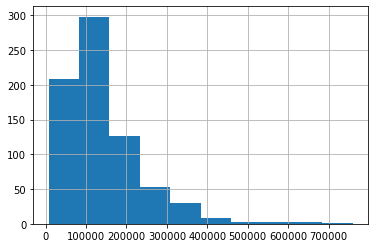

In [85]:
df.price.hist()

In [86]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,733.0,14.349250,8.671651,0.0,7.0,14.0,22.0,29.0
m2,733.0,80.712142,46.481859,18.0,50.0,71.0,102.0,363.0
Floor,733.0,3.502046,2.159376,1.0,2.0,3.0,5.0,21.0
MaxFloor,733.0,5.763984,2.432748,2.0,5.0,6.0,6.0,24.0
price,733.0,141249.317872,96432.902184,7200.0,76990.0,119970.0,175000.0,760000.0


In [87]:
df.describe().T.to_csv("center_stats.csv")